# Import Python packages

In [47]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

import torch
from torch.utils.data import TensorDataset, DataLoader
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch import nn
from torch.nn import  functional as F

In [48]:
from sklearn.neural_network import MLPRegressor

# Make dataset

In [49]:
pd_train = pd.read_excel("D:/贝叶斯/database/data_all_strain-controlled.xls",nrows=100000)#Change this path to your own path 
pd_train.head()

,load,E(Gpa),TS(Mpa),ss（Mpa）,m,Unnamed: 5,Nf(label)
0,q235b-0.002.csv,206.0,412.0,235.0,0.304,NaN,4.427583
1,q235b-0.003.csv,206.0,412.0,235.0,0.304,NaN,4.071256
2,q235b-0.004.csv,206.0,412.0,235.0,0.304,NaN,3.812111
3,q235b-0.005.csv,206.0,412.0,235.0,0.304,NaN,3.573104
4,q235b-0.006.csv,206.0,412.0,235.0,0.304,NaN,3.409764


In [50]:
pd_train.drop(columns=['Unnamed: 5'],inplace=True)
pd_train

,load,E(Gpa),TS(Mpa),ss（Mpa）,m,Nf(label)
0,q235b-0.002.csv,206.0,412.0,235.0,0.304000,4.427583
1,q235b-0.003.csv,206.0,412.0,235.0,0.304000,4.071256
2,q235b-0.004.csv,206.0,412.0,235.0,0.304000,3.812111
3,q235b-0.005.csv,206.0,412.0,235.0,0.304000,3.573104
4,q235b-0.006.csv,206.0,412.0,235.0,0.304000,3.409764
...,...,...,...,...,...,...
909,AZ31B-4-0.004-0.0069.csv,44.8,298.0,244.0,0.325444,3.281033
910,AZ31B-4-0.005-0.0087.csv,44.8,298.0,244.0,0.325444,2.763428
911,AZ31B-4-0.0075-0.013.csv,44.8,298.0,244.0,0.325444,2.255273
912,AZ31B-4-0.0100-0.0173.csv,44.8,298.0,244.0,0.325444,1.832509


In [51]:
pd_train.shape

(914, 6)

In [52]:
pd_train['Nf(label)'].value_counts()

Nf(label)
2.838849    4
3.429914    3
2.763428    3
3.152288    3
2.602060    3
           ..
2.819544    1
2.444045    1
2.822168    1
2.735599    1
1.544068    1
Name: count, Length: 872, dtype: int64

In [53]:
pd_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   load       914 non-null    object 
 1   E(Gpa)     914 non-null    float64
 2   TS(Mpa)    914 non-null    float64
 3   ss（Mpa）    914 non-null    float64
 4   m          914 non-null    float64
 5   Nf(label)  914 non-null    float64
dtypes: float64(5), object(1)
memory usage: 43.0+ KB


# Read csv files

In [54]:
csv_path = 'D:/贝叶斯/database/All data_Strain/'#Change this path to your own path

In [55]:
csv_files = pd_train['load'].values
csv_files[:5]

array(['q235b-0.002.csv', 'q235b-0.003.csv', 'q235b-0.004.csv',
       'q235b-0.005.csv', 'q235b-0.006.csv'], dtype=object)

In [56]:
one_df = pd.read_csv(csv_path+csv_files[10],header=None)
one_df.head()


,0,1
0,0.0,0.000000
1,0.0,0.000144
2,0.0,0.000289
3,0.0,0.000433
4,0.0,0.000577


In [57]:
pd.read_csv(csv_path+'E355-20-14-0.0036-0.0061.csv',header=None).iloc[:,:2]

,0,1
0,0.000000,0.000000
1,0.000932,0.001112
2,0.001800,0.002186
3,0.002546,0.003187
4,0.003118,0.004082
...,...,...
236,-0.003118,-0.004082
237,-0.002546,-0.003187
238,-0.001800,-0.002186
239,-0.000932,-0.001112


In [58]:
value_list = []
for i in range(len(csv_files)):
    try:
      # print(csv_files[i])
      one_df = pd.read_csv(csv_path+csv_files[i],header=None).iloc[:,:2]
      value_list.append(one_df.values)
      print(one_df.shape)
    except:
      print(csv_path+csv_files[i] , 'no here ')

(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(241, 2)
(

# Merge into a large array

In [59]:
csv_value_array = np.array(value_list)
csv_value_array.shape

(914, 241, 2)

In [60]:
flatten_value_list = [item.flatten() for item in  value_list]
flatten_value_list[0].shape

(482,)

<Axes: >

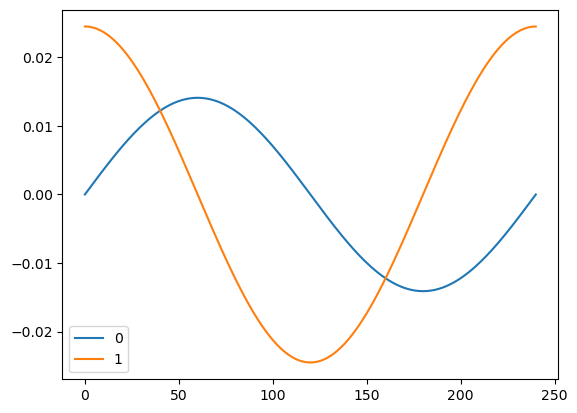

In [61]:
one_df.plot()

# Data processing pipline

In [62]:
pd_train.head()

,load,E(Gpa),TS(Mpa),ss（Mpa）,m,Nf(label)
0,q235b-0.002.csv,206.0,412.0,235.0,0.304,4.427583
1,q235b-0.003.csv,206.0,412.0,235.0,0.304,4.071256
2,q235b-0.004.csv,206.0,412.0,235.0,0.304,3.812111
3,q235b-0.005.csv,206.0,412.0,235.0,0.304,3.573104
4,q235b-0.006.csv,206.0,412.0,235.0,0.304,3.409764


In [63]:
# Filter out columns of non object type
num_cols = pd_train.select_dtypes(exclude=['object']).columns.tolist()[:-1]

print("Non-object columns:", num_cols)

Non-object columns: ['E(Gpa)', 'TS(Mpa)', 'ss（Mpa）', 'm']


In [64]:
num_si_step = ('si', SimpleImputer(strategy='median'))
num_ss_step = ('ss', StandardScaler()) #Normalization of mean standard deviation
num_steps = [num_si_step, num_ss_step]

num_pipe = Pipeline(num_steps)
num_transformers = [('num', num_pipe, num_cols)]

ct = ColumnTransformer(transformers=num_transformers)

x_all = ct.fit_transform(pd_train)
x_all.shape

(914, 4)

In [65]:
x_all[:5]

array([[ 0.8308825 , -0.48597853, -0.53890809, -0.10796619],
       [ 0.8308825 , -0.48597853, -0.53890809, -0.10796619],
       [ 0.8308825 , -0.48597853, -0.53890809, -0.10796619],
       [ 0.8308825 , -0.48597853, -0.53890809, -0.10796619],
       [ 0.8308825 , -0.48597853, -0.53890809, -0.10796619]])

In [66]:
y_all = pd_train['Nf(label)'].values
y_all.shape,y_all[:10]

((914,),
 array([4.42758347, 4.07125588, 3.81211084, 3.57310378, 3.4097641 ,
        3.0374265 , 4.61187194, 4.30209272, 3.98421217, 3.88109922]))

In [67]:
dim_num = x_all.shape[-1]
dim_num

4

In [68]:
combined_data = np.hstack((flatten_value_list, x_all))

In [69]:
combined_data

array([[ 0.00000000e+00,  0.00000000e+00,  3.33333000e-05, ...,
        -4.85978527e-01, -5.38908094e-01, -1.07966189e-01],
       [ 0.00000000e+00,  0.00000000e+00,  5.00000000e-05, ...,
        -4.85978527e-01, -5.38908094e-01, -1.07966189e-01],
       [ 0.00000000e+00,  0.00000000e+00,  6.66667000e-05, ...,
        -4.85978527e-01, -5.38908094e-01, -1.07966189e-01],
       ...,
       [ 0.00000000e+00,  1.30000000e-02,  1.96327100e-04, ...,
        -9.61780662e-01, -4.97718011e-01,  4.23691528e-01],
       [ 0.00000000e+00,  1.73000000e-02,  2.61769500e-04, ...,
        -9.61780662e-01, -4.97718011e-01,  4.23691528e-01],
       [ 0.00000000e+00,  2.45000000e-02,  3.69095000e-04, ...,
        -9.61780662e-01, -4.97718011e-01,  4.23691528e-01]])

# Divide the dataset and test set

In [70]:
from sklearn.model_selection import train_test_split

# x_all_new, csv_value_array, y_all are 3 NumPy arrays
x_train, x_test, y_train, y_test,csv_files_train, csv_files_test = train_test_split(combined_data, y_all, csv_files, test_size=0.2, random_state=42)
# The dataset was randomly divided into training and testing sets with a ratio of 8:2, which may lead to slight variations in the results for each model.
print("The size of the training set：", x_train.shape[0])
print("The size of the test set：", x_test.shape[0])
x_train.shape, x_test.shape, y_train.shape, y_test.shape

The size of the training set： 731
The size of the test set： 183


((731, 486), (183, 486), (731,), (183,))

# Machine Learning methods
   

1.SVM

In [81]:
svm_model = SVR()
svm_model.fit(x_train, y_train)
y_pred_svm_test = svm_model.predict(x_test)
y_pred_svm_train = svm_model.predict(x_train)

In [83]:
r2_score(y_test, y_pred_svm_test)

0.17342031492736965

In [73]:
mean_absolute_error(y_test, y_pred_svm_test)

0.5795628846139322

In [74]:
mean_squared_error(y_test, y_pred_svm_test)

0.553325209494284

2.Random Forest

In [85]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)
y_pred_rf_test = rf_model.predict(x_test)
y_pred_rf_train = rf_model.predict(x_train)

In [86]:
r2_score(y_test, y_pred_rf_test)

0.7760640690135434

In [87]:
mean_absolute_error(y_test, y_pred_rf_test)

0.25835637653407684

In [88]:
mean_squared_error(y_test, y_pred_rf_test)

0.14990617137595252

In [98]:
import csv
data_to_write2 = np.column_stack((y_pred_rf_test, y_test))#Change this line to decide which information you want to write in the CSV file
csv_filename = "RF_predictions_and_labels_test.csv"
with open(csv_filename, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
   
    # Write title line
    writer.writerow(['Prediction', 'Label','csvfile'])
    
    # Write data to CSV file
    for row in data_to_write2:
        writer.writerow(row)